In [2]:
#       2- Find the customer age in years using "months" column


import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('w5_Telecom_customer churn.csv')

df['age_in_years'] = df['months'] / 12

# Optionally, round the age to the nearest whole number
df['age_in_years'] = df['age_in_years'].round()

# View the resulting DataFrame with the age in years
print(df[['months', 'age_in_years']])


      months  age_in_years
0         61           5.0
1         56           5.0
2         58           5.0
3         60           5.0
4         57           5.0
...      ...           ...
9995      33           3.0
9996      33           3.0
9997      33           3.0
9998      29           2.0
9999      31           3.0

[10000 rows x 2 columns]


In [3]:
# 3- Find the difference of average of "totcalls" for churn = 0 and churn = 1


import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('w5_Telecom_customer churn.csv')

# Filter the dataset for churn = 0 and calculate the average of "totcalls"
churn_0_avg_totcalls = df.loc[df['churn'] == 0, 'totcalls'].mean()

# Filter the dataset for churn = 1 and calculate the average of "totcalls"
churn_1_avg_totcalls = df.loc[df['churn'] == 1, 'totcalls'].mean()

# Calculate the difference between the averages
difference = churn_0_avg_totcalls - churn_1_avg_totcalls

# Print the difference
print("Difference in average totcalls for churn = 0 and churn = 1:", difference)


Difference in average totcalls for churn = 0 and churn = 1: 1097.2678502663102


In [4]:
#4- Create a column which is the sum of rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean

df = pd.read_csv('w5_Telecom_customer churn.csv')
sum=df["rev_Mean"]+df['mou_Mean']+df['totmrc_Mean']+df['da_Mean']+df['ovrmou_Mean']
df['sum']=sum
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,sum
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,N,U,U,U,U,U,Y,361,1000001,265.995
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,Z,U,U,U,U,U,Y,240,1000002,600.665
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,N,U,Y,U,U,U,Y,1504,1000003,44.230
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,U,Y,U,U,U,U,Y,1812,1000004,83.500
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,I,U,U,U,U,U,Y,434,1000005,697.710


In [5]:
#5- Find the customers whose "da_Mean" value is not greater than his/her "blck_vce_Mean" value

import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('w5_Telecom_customer churn.csv')


print(df['da_Mean'].head())
print("==============================================================")


print(df['blck_vce_Mean'].head())




print("==============================================================")

# Filter the dataset for customers whose "da_Mean" is not greater than their "blck_vce_Mean"
filtered_df = df[df['da_Mean'] <= df['blck_vce_Mean']]

# Print the filtered DataFrame
print(filtered_df.head())


0    0.2475
1    0.2475
2    0.0000
3    0.0000
4    0.0000
Name: da_Mean, dtype: float64
0    0.666667
1    1.000000
2    0.000000
3    0.000000
4    0.666667
Name: blck_vce_Mean, dtype: float64
   rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean   
0   23.9975    219.25       22.500   0.2475         0.00          0.0  \
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic   
0          0.0          0.0        0.0     -157.25  ...       0.0       N  \
1          9.1          0.0        0.0      532.25  ...       0.0       Z   
2          0.0          0.0        0.0       -4.25  ...       0.0       N   
3          0.0          0.0        0.0       -1.50  ...  

In [6]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('w5_Telecom_customer churn.csv')

# Calculate the IQR  for the "mou_opkv_Mean" column
Q1 = df['mou_opkv_Mean'].quantile(0.25)
Q3 = df['mou_opkv_Mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers in the "mou_opkv_Mean" column
outliers = df[(df['mou_opkv_Mean'] < lower_bound) | (df['mou_opkv_Mean'] > upper_bound)]

# Get the count of outliers
outliers_count = outliers.shape[0]

# Print the number of outliers
print("Number of outliers in mou_opkv_Mean column:", outliers_count)
print(outliers.head())

Number of outliers in mou_opkv_Mean column: 878
    rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean   
7    38.0525    682.50        52.49   0.2475         0.00       0.0000  \
14  212.5150   1971.50        84.99   2.2275       249.50      99.8000   
27   37.6625    971.75        35.99   0.2475         4.75       1.4250   
48  107.2350    782.00        24.99   0.0000       232.75      86.1175   
67  149.9900   2382.50       149.99   0.0000         0.00       0.0000   

    vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic   
7        0.0000          0.0     0.0000      147.50  ...       1.0       S  \
14      99.8000          0.0    35.4975     -200.50  ...       0.0       N   
27       1.4250          0.0     0.0000       25.25  ...       0.0       H   
48      86.1175          0.0     0.0000     -258.00  ...       0.0       N   
67       0.0000          0.0     0.0000     -230.50  ...       0.0       H   

    kid0_2  kid3_5  kid6_10  kid11_15 

In [7]:
#7- Find the average of first 1000 items and find the average of last 1000 items, and find the difference between those

df = pd.read_csv('w5_Telecom_customer churn.csv')

column_name = 'rev_Mean'

average_first_1000 = df["rev_Mean"].head(1000).mean()

average_last_1000 = df["rev_Mean"].tail(1000).mean()

difference = average_last_1000 - average_first_1000

# Print the results
print("Average of the first 1000 items:", average_first_1000)
print("Average of the last 1000 items:", average_last_1000)
print("Difference between the averages:", difference)


Average of the first 1000 items: 78.72199097298898
Average of the last 1000 items: 59.004050484774325
Difference between the averages: -19.71794048821465


In [14]:
#8- Drop the columns whose skewness is positive

df = pd.read_csv('w5_Telecom_customer churn.csv')

# Convert 'U' values to NaN
df = df.replace('U', np.nan)



# Calculate the skewness for each column, excluding NaN values
skewness = df.select_dtypes(include=[np.number]).apply(lambda x: pd.Series(x).skew(skipna=True))


# Get the column names with positive skewness
positive_skew_columns = skewness[skewness > 0].index




# Drop the columns with positive skewness
df_dropped = df.drop(positive_skew_columns, axis=1)




print(df_dropped.head())


   change_mou new_cell crclscod asl_flag prizm_social_one   
0     -157.25      NaN        A        N                S  \
1      532.25        N       EA        N              NaN   
2       -4.25        Y        C        N                S   
3       -1.50        Y        B        N                T   
4       38.50        Y        A        N              NaN   

                            area dualband refurb_new hnd_webcap ownrent  ...   
0  NORTHWEST/ROCKY MOUNTAIN AREA        Y          N       WCMB       O  ...  \
1                   CHICAGO AREA        N          N         WC     NaN  ...   
2               GREAT LAKES AREA        N          N        NaN       O  ...   
3                   CHICAGO AREA        N          N        NaN     NaN  ...   
4               NEW ENGLAND AREA        Y          N       WCMB       R  ...   

  HHstatin dwllsize ethnic  kid0_2 kid3_5 kid6_10 kid11_15 kid16_17 creditcd   
0        C        A      N     NaN    NaN     NaN      NaN      NaN     

In [16]:
#9- Find the columns where %90 of the values are "0"


df = pd.read_csv('w5_Telecom_customer churn.csv')
zero_percentage = (df == 0).sum() / len(df) * 100

columns_with_90_percent_zero = zero_percentage[zero_percentage >= 90].index


print("Columns where 90% of the values are '0':")

print("=========================================================================================")

print(columns_with_90_percent_zero)


Columns where 90% of the values are '0':
Index(['datovr_Mean', 'drop_dat_Mean', 'blck_dat_Mean', 'unan_dat_Mean',
       'plcd_dat_Mean', 'recv_sms_Mean', 'comp_dat_Mean', 'mou_cdat_Mean',
       'peak_dat_Mean', 'mou_pead_Mean', 'opk_dat_Mean', 'mou_opkd_Mean',
       'callfwdv_Mean', 'forgntvl'],
      dtype='object')


In [17]:
# 10- Find the columns where %90 of the values are null/none


df = pd.read_csv('w5_Telecom_customer churn.csv')

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100


# Filter the columns where 90% of the values are null/none


columns_with_90_percent_null = missing_percentage[missing_percentage >= 90].index

print("Columns where 90% of the values are null/none:")



print(columns_with_90_percent_null)


Columns where 90% of the values are null/none:
Index([], dtype='object')


In [18]:
#  11- Find the categoric variables


df = pd.read_csv('w5_Telecom_customer churn.csv')

# Identify the categoric variables
categorical_variables = df.select_dtypes(include=['object'])

print("Categorical variables:")


print(categorical_variables.columns.tolist())


Categorical variables:
['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


In [23]:
#12- Find the variables (as tuple, as binary!) that are correlated each other (eg. column X is related to column Y with 0.95 correlation)




df = pd.read_csv('w5_Telecom_customer churn.csv')

# Drop columns with non-numeric values
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Find the correlated columns
correlated_columns = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        column1 = correlation_matrix.columns[i]
        column2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > 0.95:
            correlated_columns.append((column1, column2, correlation))

for column_pair in correlated_columns:
    print(f"{column_pair[0]} is correlated to {column_pair[1]} with a correlation coefficient of {column_pair[2]}")


rev_Mean is correlated to avg3rev with a correlation coefficient of 0.9639201613851458
mou_Mean is correlated to avg3mou with a correlation coefficient of 0.9858260613473036
mou_Mean is correlated to avg6mou with a correlation coefficient of 0.9569253777717768
ovrrev_Mean is correlated to vceovr_Mean with a correlation coefficient of 0.9947752530527388
plcd_vce_Mean is correlated to comp_vce_Mean with a correlation coefficient of 0.9881268742336433
plcd_vce_Mean is correlated to attempt_Mean with a correlation coefficient of 0.9988495818446786
plcd_vce_Mean is correlated to complete_Mean with a correlation coefficient of 0.9868612712499181
plcd_dat_Mean is correlated to comp_dat_Mean with a correlation coefficient of 0.9981463418508323
recv_vce_Mean is correlated to inonemin_Mean with a correlation coefficient of 0.9662795481264506
comp_vce_Mean is correlated to attempt_Mean with a correlation coefficient of 0.9868077211541855
comp_vce_Mean is correlated to complete_Mean with a correla

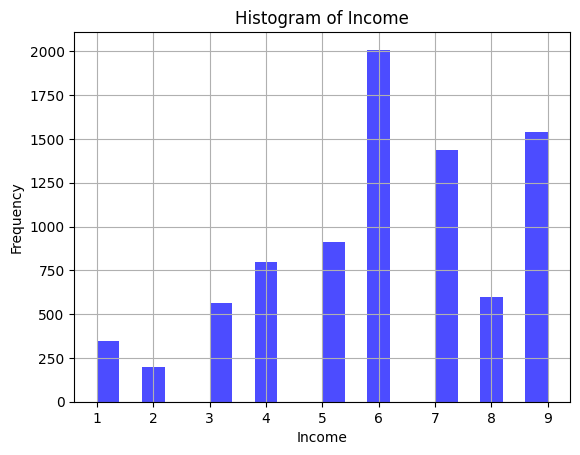

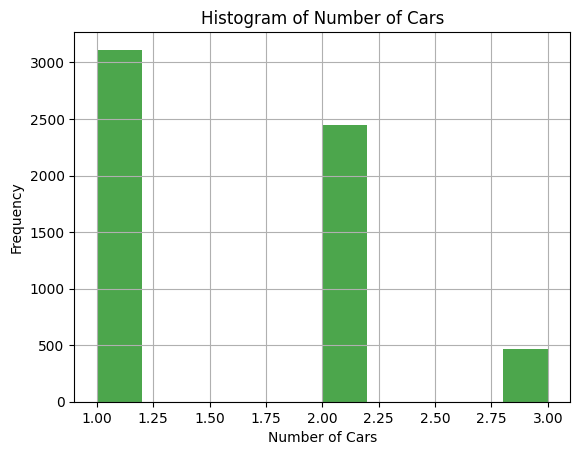

In [31]:
#14- Plot the histogram of income, numbcars, using matplotlib



import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('w5_Telecom_customer churn.csv')

# Plot the histogram of "income"
plt.hist(df['income'], bins=20, alpha=0.7, color='blue')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.grid(True)
plt.show()

# Plot the histogram of "numbcars"
plt.hist(df['numbcars'], bins=10, alpha=0.7, color='green')
plt.xlabel('Number of Cars')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Cars')
plt.grid(True)
plt.show()


In [33]:
#15- Find the most frequent value for each column, create a list from those values



df = pd.read_csv('w5_Telecom_customer churn.csv')

# Find the most frequent value for each column
most_frequent_values = df.mode().iloc[0].tolist()

print("Most frequent values for each column:")
print(most_frequent_values)


Most frequent values for each column:
[29.99, 0.0, 29.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.0, 1.0, 1.0, 'Y', 'A', 'N', 1122.0, 6144.0, 1084.46, 776.94, 4433.0, 1542.0, 17.04, 412.0, 86.0, 0.0, 0.0, 30.0, 0.0, 0.0, 31.0, 'S', 'NEW YORK CITY AREA', 'Y', 'N', 29.98999023, 1.0, 2.0, 'WCMB', 0.0, 0.0, 'O', 1.0, 'S', 'M', 2.0, 'M', 6.0, 1.0, 'C', 'A', 0.0, 'N', 'U', 'U', 'U', 'U', 'U', 'Y', 93.0, 1000001]
